# Read, show, and save imgs

In [1]:
import cv2

import numpy as np
from PIL import Image

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

import matplotlib.pyplot as plt

## read & show

### 彩色圖片

* 常見的讀檔套件比較

| package  | read function                                                                                                                                                      | show function                                                                                                  | save function                                                                                  | type                       | channel | dimension (color img)    | dimension (gray img)                                      | value range | value type |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|----------------------------|---------|--------------------------|-----------------------------------------------------------|-------------|------------|
| plt      | import matplotlib.pyplot as plt<br><br>img_array = plt.imread("xx.jpg")                                                                                            | plt.show(img_array)                                                                                            | plt.imsave('xx.png', img_array)                                                                | ndarray                    | R, G, B | (height, width, channel) | (height, width)                                           | [0-255]     | uint8      |
| PIL      | import np<br>from PIL import Image<br><br>img_obj = Image.open("xx.jpg")<br>img_array = np.asarray(img_obj)                                                        | img<br><br>plt.imshow(img_array)                                                                               | img_obj.save("xx.jpeg")<br><br>img_obj = Image.fromarray(img_array)<br>img_obj.save("xx.jpeg") | <br><br><br>PIL<br>ndarray | R, G, B | (height, width, channel) | (height, width, channel)<br># channel = 3<br># same value | [0-255]     | uint8      |
| tf.keras | from tensorflow.keras.preprocessing.image import <br>load_img, img_to_array, array_to_img<br><br>img_obj = load_img("xx.jpg")<br>img_array = img_to_array(img_obj) | img<br>plt.imshow(img_array)                                                                                   | img_obj.save("xx.jpeg")<br><br>img_obj = array_to_img(img_array)<br>img_obj.save("xx.jpeg")    | <br><br>PIL<br>ndarray     | R, G, B | (height, width, channel) | (height, width, channel)                                  | [0.-255.]   | float32    |
| cv2      | import cv2<br>img_array = cv2.imread("xx.jpg")                                                                                                                     | plt.imshow(img_array)<br><br>cv2.imshow("window_name", img_array)<br>cv2.waitKey(0)<br>cv2.destroyAllWindows() | cv2.imwrite('xx.png', img_array)                                                               | ndarray                    | B, G, R | (height, width, channel) | (height, width, channel)                                  | [0-255]     | uint8      |

* 可以看到 3 個重點：
  * channel 的順序，只有 CV2 是 BGR, 其他全都是 RGB
  * value range: 只有 pytorch 讀進來會轉換成多少，其他全都是 0~255
  * value type 只有 tf.keras 轉完是 float32, 其他都是 uint8

#### plt.imread

In [3]:
import matplotlib.pyplot as plt

In [4]:
plt_img = plt.imread("imgs/fruits-2.jpg")

In [5]:
print(f"read image type: {type(plt_img)}")
print(f"read image data type: {plt_img.dtype}")
print(f"read image data shape: {plt_img.shape}")

read image type: <class 'numpy.ndarray'>
read image data type: uint8
read image data shape: (417, 626, 3)


* 來看一下圖片長怎樣

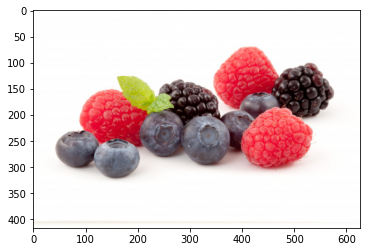

In [6]:
plt.imshow(plt_img);

#### PIL, tf.keras

In [7]:
import numpy as np
from PIL import Image

In [8]:
pil_img = Image.open("imgs/fruits-2.jpg")

In [9]:
print(f"read image type: {type(pil_img)}")

read image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [10]:
pil_img_array = np.asarray(pil_img)

In [11]:
print(f"read image type: {type(pil_img_array)}")
print(f"read image data type: {pil_img_array.dtype}")
print(f"read image data shape: {pil_img_array.shape}")

read image type: <class 'numpy.ndarray'>
read image data type: uint8
read image data shape: (417, 626, 3)


* keras 是直接沿用 PIL，所以結果都和剛剛一樣：

In [12]:
keras_img = load_img("imgs/fruits-2.jpg")

In [13]:
print(f"read image type: {type(keras_img)}")

read image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [14]:
keras_img_array = img_to_array(keras_img)

In [15]:
print(f"read image type: {type(keras_img_array)}")
print(f"read image data type: {keras_img_array.dtype}")
print(f"read image data shape: {keras_img_array.shape}")

read image type: <class 'numpy.ndarray'>
read image data type: float32
read image data shape: (417, 626, 3)


* 可以看到，keras 的 data type 是 float32
* 驗證一下，兩個套件讀出來的 numpy array 完全一樣 (注意： integer 255, 和 float 255.0，比較時會視為一樣)：

In [16]:
(keras_img_array == pil_img_array).all()

True

* 看一下圖

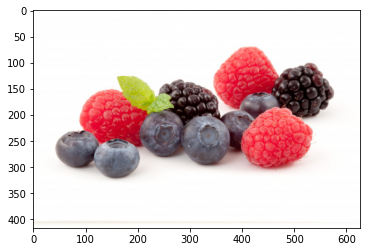

In [17]:
plt.imshow(keras_img_array.astype("uint8"))

#### cv2

In [18]:
cv2_img = cv2.imread("imgs/fruits-2.jpg")

In [19]:
print(f"read image type: {type(cv2_img)}")
print(f"read image data type: {cv2_img.dtype}")
print(f"read image data shape: {cv2_img.shape}")

read image type: <class 'numpy.ndarray'>
read image data type: uint8
read image data shape: (417, 626, 3)


* 可以看到，shape 和剛剛一樣
* 但他的第三個軸，是 GBR，不是 RGB，所以一樣用 `plt.imshow()` 來畫圖時，可以看出差異

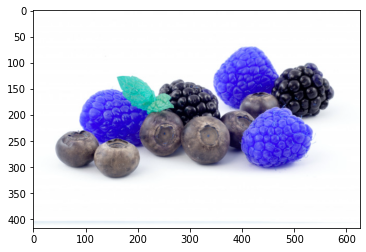

In [20]:
plt.imshow(cv2_img);

* 原本的紅色，都變藍色了，就是因為 R 和 B 的 channel 調換了，而 `plt.imshow()` 是以為你輸入的影像是 RGB
* 如果要用 `plt.imshow()` 來顯示正確顏色的話，就要把原本的 array 的通道做調整，例如這樣

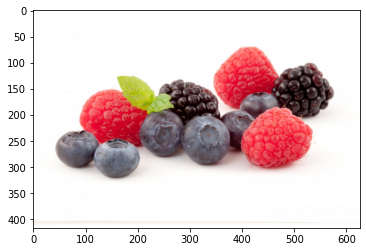

In [21]:
plt.imshow(cv2_img[:,:,::-1]); # 對通道那個軸，取最後到最前 (::-1)，就把 BGR 變成 RGB 了

* 或是，你要用 cv2 裡的 function 也可以

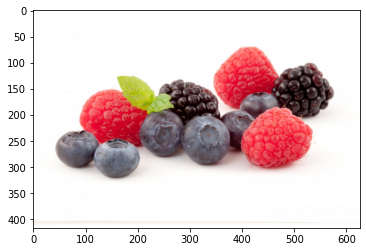

In [22]:
img_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb);

* 那，最後一種做法，是直接用 cv2 的 function 來 show 圖，他就會知道你的影像是 BGR，就會顯是正確

In [27]:
cv2.imshow("window_name", cv2_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 灰階圖片

* 原始的灰階圖片，不會有 channel，所以讀進來應該是 (1024, 1024) 這種 shape
* 但是！！！！！
* 只有 `plt.imread()`，讀進來會是 (1024, 1024)
* 其他像 `cv2.imread()`, 或是 PIL 的 `Image.open()`, 或是 keras 的 `load_img()`，讀進來都會是 (1024, 1024, 3) 這種 shape，然後 3 個 channel 值都一樣

In [23]:
plt_img = plt.imread("imgs/chest_xray_image.png")
print(f"Image shape is: {plt_img.shape}")

Image shape is: (1024, 1024)


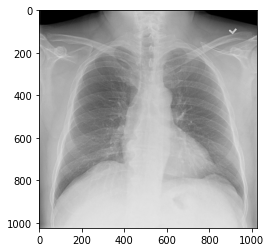

In [24]:
plt.imshow(plt_img, cmap = "gray");

In [25]:
cv2_img = cv2.imread("imgs/chest_xray_image.png")
print(f"Image shape is: {cv2_img.shape}")

Image shape is: (1024, 1024, 3)


* 然後，三個通道的值都一樣

In [26]:
print((cv2_img[:,:,0] == cv2_img[:,:,1]).all())
print((cv2_img[:,:,0] == cv2_img[:,:,2]).all())
print((cv2_img[:,:,1] == cv2_img[:,:,2]).all())

True
True
True


* 畫圖時，三個通道的值都相同，混出來就變灰階的顏色

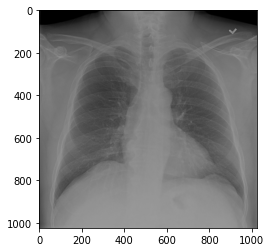

In [27]:
plt.imshow(cv2_img);

* 不相信的話，你三個通道都寫 0 ，會幫你混出全黑的圖

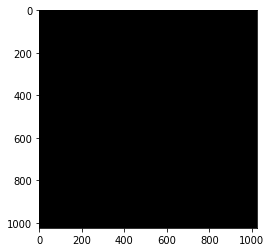

In [28]:
plt.imshow(np.zeros((1024,1024,3)));

* PIL 和 keras，也是和 cv2 一樣，都是同樣的值，複製三次給三個通道

In [29]:
keras_img = img_to_array(load_img("imgs/chest_xray_image.png"))
print(f"Image shape is {keras_img.shape}")

Image shape is (1024, 1024, 3)


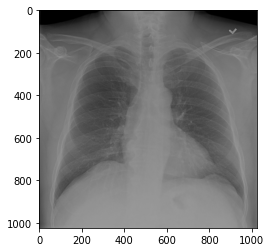

In [30]:
plt.imshow(keras_img.astype("uint8"));

## save

### 存彩色圖片

* 將 np.array 存成 圖片：
  * 如果你的 np.array 的 channel 是 RGB，請用 `plt.imsave()` 來存，因為 plt當初在讀的時候，就預設讀進來後轉成 RGB 的 array
  * 如果你的 np.array 的 channel 是 BGR，請用 `cv2.imwrite()` 來存。因為 cv2 當初在讀檔時，就預設讀進來後轉成 BGR 的 array
* 將 np.array 先轉成 PIL 物件，再存成圖片
  * PIL 或 keras，他們本身就有 PIL 物件可用，那就用該物件的 `.save()` method 來存。所以，就要把 np.array 先轉回 PIL 物件，再存

#### np.array 存檔，用 `cv2.imread()`，但要注意 channel

* 如果我用 `plt.imread()` 來讀檔，那 array 的 channel 會是 RGB

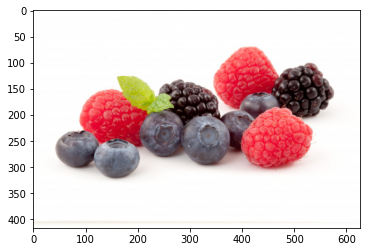

In [46]:
plt_img = plt.imread("imgs/fruits-2.jpg")
plt.imshow(plt_img);

* 此時，如果我用 `cv2.imwrite()` 來存檔，他會把你的 array 當 BGR 來存

In [47]:
cv2.imwrite("imgs/temp.jpg", plt_img)

True

* 所以，讀檔後，就會發現他剛剛存出去存錯了

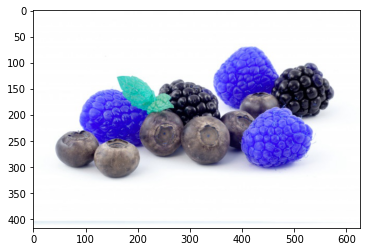

In [48]:
plt_img = plt.imread("imgs/temp.jpg")
plt.imshow(plt_img);

* 那，一種做法，是把這個影像轉成 BGR，再存

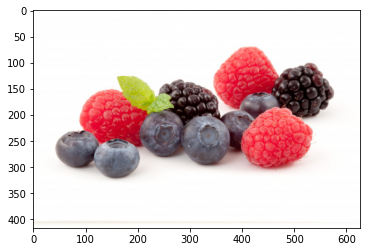

In [49]:
plt_img = plt.imread("imgs/fruits-2.jpg")
plt.imshow(plt_img);

In [50]:
cv2.imwrite("imgs/temp.jpg", plt_img[:,:,::-1])

True

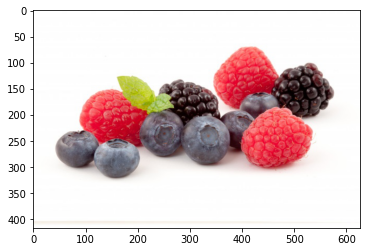

In [51]:
plt_img = plt.imread("imgs/temp.jpg")
plt.imshow(plt_img);

* 另一種作法，是用 `matplotlib.image.imsave` 來存，那就會預設你是給他 RGB

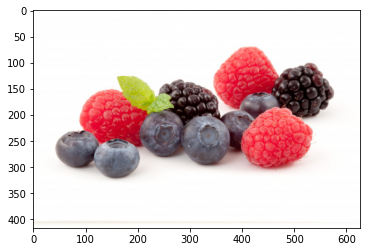

In [52]:
plt_img = plt.imread("imgs/fruits-2.jpg")
plt.imshow(plt_img);

In [53]:
import matplotlib
matplotlib.image.imsave('imgs/temp.jpg', plt_img)

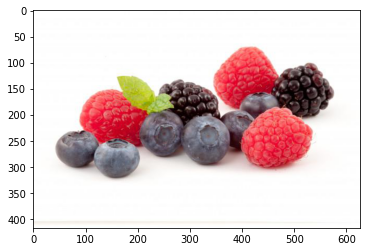

In [54]:
plt_img = plt.imread("imgs/temp.jpg")
plt.imshow(plt_img);

#### 轉回 PIL 物件，再存檔

* 那對於 np.array 的資料，我們都可以轉回 PIL 物件

In [56]:
plt_img = plt.imread("imgs/temp.jpg")

import PIL
img_obj = PIL.Image.fromarray(plt_img)
type(img_obj)

PIL.Image.Image

* 接著，用 `.save()` method 來存檔

In [57]:
img_obj.save("imgs/temp.jpg")

* 讀檔後就可發現是對的了

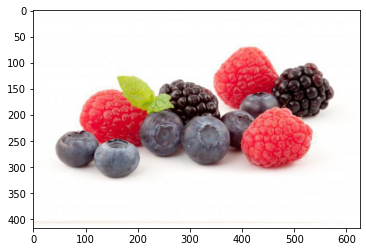

In [58]:
plt_img = plt.imread("imgs/temp.jpg")
plt.imshow(plt_img)

* 那因為 keras 的底層就是 PIL，所以做法也是一樣的

In [59]:
img_obj = array_to_img(plt_img)
img_obj.save("imgs/temp.jpg")

* 一樣讀檔後，就可載入

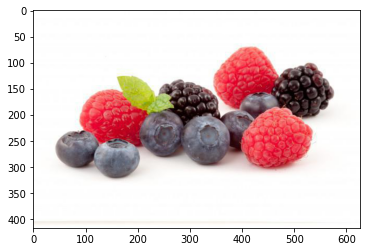

In [61]:
plt_img = plt.imread("imgs/temp.jpg")
plt.imshow(plt_img);

### 存灰階圖片

* 如果原本的圖片，是只有 (height, width)，而沒有 channel 的 numpy array，那用

In [24]:
plt_img = plt.imread("imgs/chest_xray_image.png")
print(f"Image shape is: {plt_img.shape}")

Image shape is: (1024, 1024)


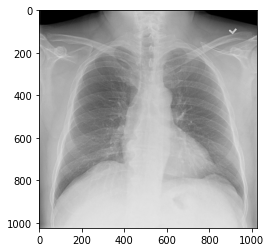

In [25]:
plt.imshow(plt_img, cmap = "gray");

In [5]:
cv2.imwrite("imgs/temp.jpg", plt_img)

True

In [7]:
plt_img = plt.imread("imgs/temp.jpg")
print(f"Image shape is: {plt_img.shape}")

Image shape is: (1024, 1024)


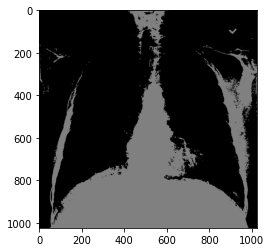

In [8]:
plt.imshow(plt_img, cmap = "gray")

In [12]:
set(plt_img.flatten())

{0, 1, 2}

In [15]:
import matplotlib
matplotlib.image.imsave("imgs/temp.jpg", plt_img)

In [27]:
plt_img = plt.imread("imgs/temp.jpg")
print(f"Image shape is: {plt_img.shape}")

Image shape is: (1024, 1024, 3)


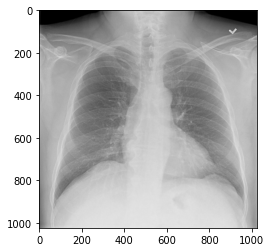

In [29]:
plt.imshow(plt_img)

In [30]:
(plt_img[:,:,0] == plt_img[:,:,1]).all()

True

In [22]:
plt.imsave('imgs/temp.jpg', plt_img)

In [26]:
plt.imsave('imgs/temp.jpg', plt_img, cmap='gray')